In [1]:
#import libraries

%matplotlib inline

import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm


C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#load datasets

os.chdir('C:/Users/trinh/Desktop/CEBD1260/Deliverables/Week3/Stocks')

ge=pd.read_csv('ge.us.txt')
print('ge',ge)

cil=pd.read_csv('cil.us.txt')
print('cil',cil)


ge              Date     Open     High      Low    Close     Volume  OpenInt
0      1962-01-02   0.6277   0.6362   0.6201   0.6201    2575579        0
1      1962-01-03   0.6201   0.6201   0.6122   0.6201    1764749        0
2      1962-01-04   0.6201   0.6201   0.6037   0.6122    2194010        0
3      1962-01-05   0.6122   0.6122   0.5798   0.5957    3255244        0
4      1962-01-08   0.5957   0.5957   0.5716   0.5957    3696430        0
5      1962-01-09   0.5957   0.6037   0.5878   0.5957    2778285        0
6      1962-01-10   0.5957   0.6037   0.5957   0.5957    2337096        0
7      1962-01-11   0.5957   0.5957   0.5878   0.5957    1943605        0
8      1962-01-12   0.5957   0.6037   0.5878   0.5878    2015151        0
9      1962-01-15   0.5957   0.5957   0.5957   0.5957    2527879        0
10     1962-01-16   0.5957   0.6037   0.5957   0.6037    1657434        0
11     1962-01-17   0.6037   0.6037   0.5878   0.5878    2551729        0
12     1962-01-18   0.5878   0.5957

In [3]:
#describe the datasets

print(ge.describe())
print(cil.describe())

#ensure the dates are seen as dates

ge['Date']=pd.to_datetime(ge['Date'])
cil['Date']=pd.to_datetime(cil['Date'])



               Open          High           Low         Close        Volume  \
count  14058.000000  14058.000000  14058.000000  14058.000000  1.405800e+04   
mean      10.534737     10.642538     10.421090     10.534161  2.423066e+07   
std       11.742897     11.868891     11.612159     11.743726  3.369859e+07   
min        0.459020      0.466900      0.451140      0.459020  0.000000e+00   
25%        0.901500      0.909600      0.893800      0.901500  5.496950e+06   
50%        3.880900      3.912700      3.824300      3.884800  1.597520e+07   
75%       21.416000     21.658000     21.149250     21.370000  2.853667e+07   
max       47.751000     48.459000     47.596000     48.056000  9.345354e+08   

       OpenInt  
count  14058.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
             Open        High         Low       Close         Volume  OpenInt
count  380.000000  380.000000  380.000000  380.000000    

In [4]:
#feature engineering

x_columns=['Date','Close']

In [5]:
#split datasets for training purposes

threshold=0.9
ge_threshold=int(len(ge)*threshold)
cil_threshold=int(len(cil)*threshold)

ge_x_train=ge.ix[:ge_threshold,x_columns]
ge_x_test=ge.ix[ge_threshold:,x_columns]

cil_x_train=cil.ix[:cil_threshold,x_columns]
cil_x_test=cil.ix[cil_threshold:,x_columns]

print('ge_x_train',ge_x_train.shape)
print('ge_x_test',ge_x_test.shape)

print('cil_x_train',cil_x_train.shape)
print('cil_x_test',cil_x_test.shape)

print(cil_x_test)
print('Length of dataset in days:',len(cil_x_test))

ge_x_train (12653, 2)
ge_x_test (1406, 2)
cil_x_train (343, 2)
cil_x_test (38, 2)
          Date    Close
342 2017-09-18  39.1800
343 2017-09-19  39.2800
344 2017-09-20  39.2500
345 2017-09-21  39.1690
346 2017-09-22  39.1660
347 2017-09-25  38.9750
348 2017-09-26  38.7760
349 2017-09-27  38.9400
350 2017-09-28  39.0500
351 2017-09-29  39.1400
352 2017-10-02  39.0000
353 2017-10-03  39.2100
354 2017-10-04  39.3100
355 2017-10-05  39.1500
356 2017-10-06  39.1750
357 2017-10-09  39.3090
358 2017-10-10  39.5340
359 2017-10-11  39.6570
360 2017-10-12  39.7760
361 2017-10-13  39.8690
362 2017-10-17  39.7400
363 2017-10-18  39.8535
364 2017-10-19  39.7990
365 2017-10-20  39.8280
366 2017-10-23  39.6958
367 2017-10-24  39.8500
368 2017-10-25  39.6160
369 2017-10-26  39.8600
370 2017-10-27  39.6755
371 2017-10-31  40.0065
372 2017-11-01  40.0316
373 2017-11-02  39.9944
374 2017-11-03  40.0700
375 2017-11-06  40.1150
376 2017-11-07  39.9900
377 2017-11-08  40.1600
378 2017-11-09  39.8600
379 20

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

print('Cil Initial ADF')
resultcil=adfuller(cil['Close'])
print('Cil ADF Statistic: %f' % resultcil[0])
print('p-value: %f' % resultcil[1])
print('Critical Values:')
for key, value in resultcil[4].items():
    print('\t%s: %.3f' % (key,value))

print('GE Initial ADF')
resultge=adfuller(ge['Close'])
print('GE ADF Statistic: %f' % resultge[0])
print('p-value: %f' % resultge[1])
print('Critical Values:')
for key, value in resultge[4].items():
    print('\t%s: %.3f' % (key,value))
    
#generate first difference and test for the presence of unit roots

cil['lagClose']=cil['Close'].shift(-1)
cil['fdClose']=cil['Close']-cil['lagClose']
cil=cil.dropna()

ge['lagClose']=ge['Close'].shift(-1)
ge['fdClose']=ge['Close']-ge['lagClose']
ge=ge.dropna()

print('Cil First differencing ADF')
resultfdcil=adfuller(cil['fdClose'])
print('ADF Statistic: %f' % resultfdcil[0])
print('p-value: %f' % resultfdcil[1])
print('Critical Values:')
for key, value in resultfdcil[4].items():
    print('\t%s: %.3f' % (key,value))
    
print('GE First differencing ADF')
resultfdge=adfuller(cil['fdClose'])
print('ADF Statistic: %f' % resultfdge[0])
print('p-value: %f' % resultfdge[1])
print('Critical Values:')
for key, value in resultfdge[4].items():
    print('\t%s: %.3f' % (key,value))

Cil Initial ADF
Cil ADF Statistic: 0.213606
p-value: 0.973014
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
GE Initial ADF
GE ADF Statistic: -1.064494
p-value: 0.729022
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Cil First differencing ADF
ADF Statistic: -8.911093
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
GE First differencing ADF
ADF Statistic: -8.911093
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


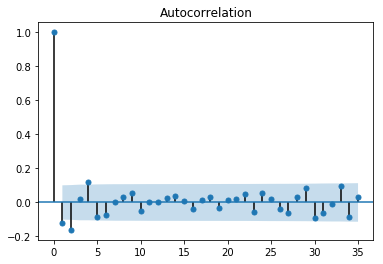

In [7]:
#Autocorrelation function and Partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(cil['fdClose'],lags=35)
plt.show()

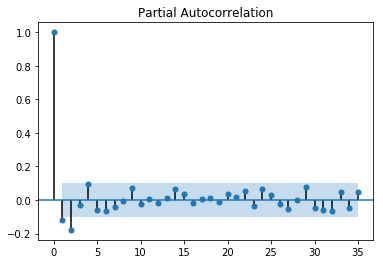

In [8]:
#Partial Autocorrelation function correlogram (PACF)
plot_pacf(cil['fdClose'],lags=35)
plt.show()

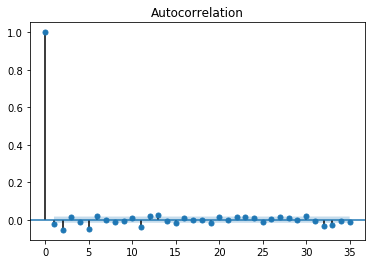

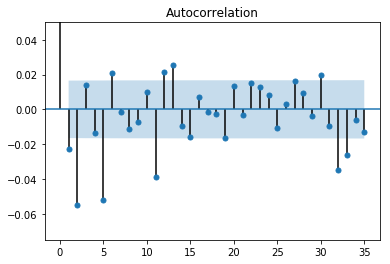

In [9]:
#ACF for GE
plot_acf(ge['fdClose'],lags=35)
plt.show()

plot_acf(ge['fdClose'],lags=35)
plt.ylim(-0.075,0.05)
plt.show()

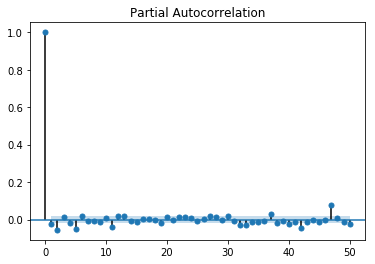

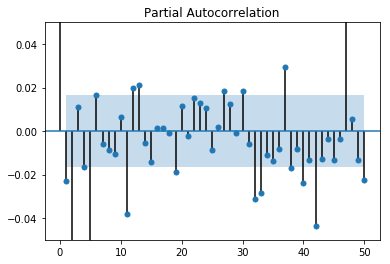

In [10]:
#Partial Autocorrelation function correlogram for GE(PACF)
plot_pacf(ge['fdClose'],lags=50)
plt.show()

plot_pacf(ge['fdClose'],lags=50)
plt.ylim(-0.05,0.05)
plt.show()

In [11]:
#ARIMA diagnostics for short period of time (cil)
import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

cilarima3=sm.tsa.ARIMA(cil_x_train['Close'], order=(3,1,3),dates=cil_x_train['Date'])
cilarima3_fit=cilarima3.fit()
# cilarima3_coeff=cilarima3_fit.maparams
# cilarima3_resid=cilarima3_fit.resid
print(cilarima3_fit.summary())

cilarima2=sm.tsa.ARIMA(cil_x_train['Close'], order=(2,1,2),dates=cil_x_train['Date'])
cilarima2_fit=cilarima2.fit()
print(cilarima2_fit.summary())

cilarima4=sm.tsa.ARIMA(cil_x_train['Close'], order=(4,1,4),dates=cil_x_train['Date'])
cilarima4_fit=cilarima4.fit()
print(cilarima4_fit.summary())

# cil_x_pred3=cilarima3.predict([cil_x_test['Date'],cil_x_test['Date']])
# print(cil_x_pred3)
cilarima3_f=cilarima3_fit.forecast(steps=len(cil_x_test))[0]
print('forecast arima3',cilarima3_f)

cilarima2_f=cilarima2_fit.forecast(steps=len(cil_x_test))[0]
print('forecast arima2',cilarima2_f)

cilarima4_f=cilarima4_fit.forecast(steps=len(cil_x_test))[0]
print('forecast arima4',cilarima4_f)


#ARIMA diagnostics for short period of time (ge)
gearima3=sm.tsa.ARIMA(ge_x_train['Close'], order=(3,1,3),dates=ge_x_train['Date'])
gearima3_fit=gearima3.fit()
# gearima3_coeff=gearima3_fit.maparams
# gearima3_resid=gearima3_fit.resid
print(gearima3_fit.summary())

gearima2=sm.tsa.ARIMA(ge_x_train['Close'], order=(2,1,2),dates=ge_x_train['Date'])
gearima2_fit=gearima2.fit()
print(gearima2_fit.summary())

gearima4=sm.tsa.ARIMA(ge_x_train['Close'], order=(4,1,4),dates=ge_x_train['Date'])
gearima4_fit=gearima4.fit()
print(gearima4_fit.summary())

# ge_x_pred3=gearima3.predict([ge_x_test['Date'],ge_x_test['Date']])
# print(ge_x_pred3)
gearima3_f=gearima3_fit.forecast(steps=len(ge_x_test))[0]
print('forecast arima3',gearima3_f)

gearima2_f=gearima2_fit.forecast(steps=len(ge_x_test))[0]
print('forecast arima2',gearima2_f)

gearima4_f=gearima4_fit.forecast(steps=len(ge_x_test))[0]
print('forecast arima4',gearima4_f)

C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  342
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -157.655
Method:                       css-mle   S.D. of innovations              0.383
Date:                Mon, 04 Jun 2018   AIC                            331.309
Time:                        16:57:09   BIC                            361.988
Sample:                    08-21-2015   HQIC                           343.531
                         - 09-18-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.018      1.073      0.284      -0.016       0.053
ar.L1.D.Close    -0.7542      0.234     -3.228      0.001      -1.212      -0.296
ar.L2.D.Close    -0.4863      0.173     

C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  342
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -155.856
Method:                       css-mle   S.D. of innovations              0.380
Date:                Mon, 04 Jun 2018   AIC                            331.712
Time:                        16:57:14   BIC                            370.061
Sample:                    08-21-2015   HQIC                           346.989
                         - 09-18-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0180      0.019      0.950      0.343      -0.019       0.055
ar.L1.D.Close    -0.7706      0.112     -6.864      0.000      -0.991      -0.551
ar.L2.D.Close    -1.3005      0.097    -

C:\Users\trinh\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                12652
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1645.414
Method:                       css-mle   S.D. of innovations              0.276
Date:                Mon, 04 Jun 2018   AIC                           3306.827
Time:                        16:57:29   BIC                           3366.392
Sample:                    01-03-1962   HQIC                          3326.756
                         - 04-13-2012                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.002      0.590      0.555      -0.003       0.005
ar.L1.D.Close     0.0356      0.090      0.395      0.693      -0.141       0.212
ar.L2.D.Close    -0.1833      0.060     

          Date   Close  lagClose  fdClose
0   2015-08-20  32.859    31.990    0.869
1   2015-08-21  31.990    31.554    0.436
2   2015-08-24  31.554    31.772   -0.218
3   2015-08-25  31.772    31.325    0.447
4   2015-08-26  31.325    32.316   -0.991
5   2015-08-27  32.316    32.048    0.268
6   2015-08-31  32.048    31.144    0.904
7   2015-09-01  31.144    31.849   -0.705
8   2015-09-10  31.849    32.677   -0.828
9   2015-09-17  32.677    30.920    1.757
10  2015-09-30  30.920    31.587   -0.667
11  2015-10-02  31.587    32.498   -0.911
12  2015-10-08  32.498    32.755   -0.257
13  2015-10-09  32.755    32.726    0.029
14  2015-10-12  32.726    32.505    0.221
15  2015-10-13  32.505    32.478    0.027
16  2015-10-14  32.478    32.878   -0.400
17  2015-10-15  32.878    33.013   -0.135
18  2015-10-16  33.013    32.812    0.201
19  2015-10-19  32.812    33.509   -0.697
20  2015-10-23  33.509    33.413    0.096
21  2015-10-26  33.413    33.137    0.276
22  2015-11-05  33.137    32.974  

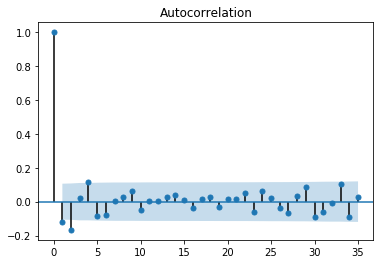

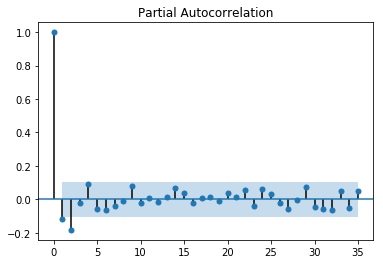

In [12]:
#test cil using train using correlogram (Compare AIC/BIC for train set)

cil_x_train['lagClose']=cil_x_train['Close'].shift(-1)
cil_x_train['fdClose']=cil_x_train['Close']-cil_x_train['lagClose']
cil_x_train=cil_x_train.dropna()

print(cil_x_train)

plot_acf(cil_x_train['fdClose'],lags=35)
plt.show()
print('')
plot_pacf(cil_x_train['fdClose'],lags=35)
plt.show()

In [13]:
#merge all predictions into the test set (Cil)

cilarima_t=cil_x_test
cilarima_t['pred3']=cilarima3_f
cilarima_t['pred2']=cilarima2_f
cilarima_t['pred4']=cilarima4_f
print(cilarima_t)

#calculate the mean absolute error and mean squared error (Cil)

cilarima3_mae=mean_absolute_error(cilarima_t['Close'],cilarima_t['pred3'])
cilarima2_mae=mean_absolute_error(cilarima_t['Close'],cilarima_t['pred2'])
cilarima4_mae=mean_absolute_error(cilarima_t['Close'],cilarima_t['pred4'])

cilarima3_rmse=np.sqrt(mean_squared_error(cilarima_t['Close'],cilarima_t['pred3']))
cilarima2_rmse=np.sqrt(mean_squared_error(cilarima_t['Close'],cilarima_t['pred2']))
cilarima4_rmse=np.sqrt(mean_squared_error(cilarima_t['Close'],cilarima_t['pred4']))

print('Cil ARIMA(3,1,3) MAE',cilarima3_mae)
print('Cil ARIMA(2,1,2) MAE',cilarima2_mae)
print('Cil ARIMA(4,1,4) MAE',cilarima4_mae)
print('Cil ARIMA(3,1,3) RMSE',cilarima3_rmse)
print('Cil ARIMA(2,1,2) RMSE',cilarima2_rmse)
print('Cil ARIMA(4,1,4) RMSE',cilarima4_rmse)


cil_x_train['pred3']=cil_x_train['Close']
cil_x_train['pred2']=cil_x_train['Close']
cil_x_train['pred4']=cil_x_train['Close']

cil_final=[]
cil_final.append(cil_x_train)
cil_final.append(cilarima_t)

cil_final=pd.concat(cil_final,ignore_index=True)
cil_final.reset_index(inplace=True,drop=True)

print(cil_final)

#merge all predictions into the test set (GE)

gearima_t=ge_x_test
gearima_t['pred3']=gearima3_f
gearima_t['pred2']=gearima2_f
gearima_t['pred4']=gearima4_f
print(gearima_t)

#calculate the mean absolute error and mean squared error (GE)

gearima3_mae=mean_absolute_error(gearima_t['Close'],gearima_t['pred3'])
gearima2_mae=mean_absolute_error(gearima_t['Close'],gearima_t['pred2'])
gearima4_mae=mean_absolute_error(gearima_t['Close'],gearima_t['pred4'])

gearima3_rmse=np.sqrt(mean_squared_error(gearima_t['Close'],gearima_t['pred3']))
gearima2_rmse=np.sqrt(mean_squared_error(gearima_t['Close'],gearima_t['pred2']))
gearima4_rmse=np.sqrt(mean_squared_error(gearima_t['Close'],gearima_t['pred4']))

print('Ge ARIMA(3,1,3) MAE',gearima3_mae)
print('Ge ARIMA(2,1,2) MAE',gearima2_mae)
print('Ge ARIMA(4,1,4) MAE',gearima4_mae)
print('Ge ARIMA(3,1,3) RMSE',gearima3_rmse)
print('Ge ARIMA(2,1,2) RMSE',gearima2_rmse)
print('Ge ARIMA(4,1,4) RMSE',gearima4_rmse)


ge_x_train['pred3']=ge_x_train['Close']
ge_x_train['pred2']=ge_x_train['Close']
ge_x_train['pred4']=ge_x_train['Close']

ge_final=[]
ge_final.append(ge_x_train)
ge_final.append(gearima_t)

ge_final=pd.concat(ge_final,ignore_index=True)
ge_final.reset_index(inplace=True,drop=True)

print(ge_final)

          Date    Close      pred3      pred2      pred4
342 2017-09-18  39.1800  39.164460  39.148362  39.091714
343 2017-09-19  39.2800  39.115116  39.122059  39.066885
344 2017-09-20  39.2500  39.183826  39.167326  39.172586
345 2017-09-21  39.1690  39.222200  39.222965  39.205464
346 2017-09-22  39.1660  39.249434  39.230575  39.209478
347 2017-09-25  38.9750  39.218143  39.221461  39.202268
348 2017-09-26  38.7760  39.257397  39.242654  39.177827
349 2017-09-27  38.9400  39.279614  39.281523  39.257406
350 2017-09-28  39.0500  39.320867  39.302670  39.309293
351 2017-09-29  39.1400  39.307239  39.307958  39.266481
352 2017-10-02  39.0000  39.337533  39.322519  39.285640
353 2017-10-03  39.2100  39.348218  39.350003  39.311866
354 2017-10-04  39.3100  39.390305  39.373548  39.330125
355 2017-10-05  39.1500  39.387856  39.387273  39.385979
356 2017-10-06  39.1750  39.417292  39.401819  39.368689
357 2017-10-09  39.3090  39.422612  39.423398  39.357798
358 2017-10-10  39.5340  39.461

            Date    Close      pred3      pred2      pred4
0     1962-01-02   0.6201   0.620100   0.620100   0.620100
1     1962-01-03   0.6201   0.620100   0.620100   0.620100
2     1962-01-04   0.6122   0.612200   0.612200   0.612200
3     1962-01-05   0.5957   0.595700   0.595700   0.595700
4     1962-01-08   0.5957   0.595700   0.595700   0.595700
5     1962-01-09   0.5957   0.595700   0.595700   0.595700
6     1962-01-10   0.5957   0.595700   0.595700   0.595700
7     1962-01-11   0.5957   0.595700   0.595700   0.595700
8     1962-01-12   0.5878   0.587800   0.587800   0.587800
9     1962-01-15   0.5957   0.595700   0.595700   0.595700
10    1962-01-16   0.6037   0.603700   0.603700   0.603700
11    1962-01-17   0.5878   0.587800   0.587800   0.587800
12    1962-01-18   0.5957   0.595700   0.595700   0.595700
13    1962-01-19   0.6037   0.603700   0.603700   0.603700
14    1962-01-22   0.6037   0.603700   0.603700   0.603700
15    1962-01-23   0.5878   0.587800   0.587800   0.5878

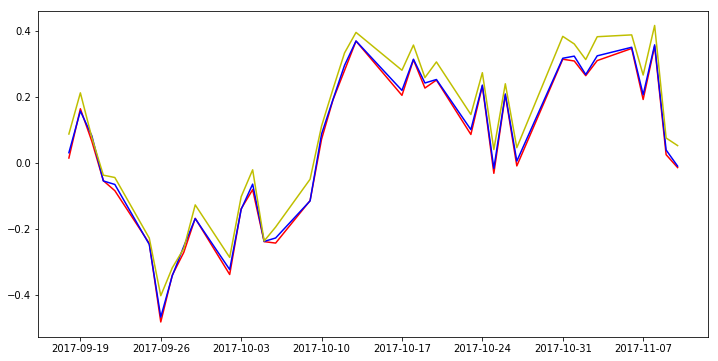

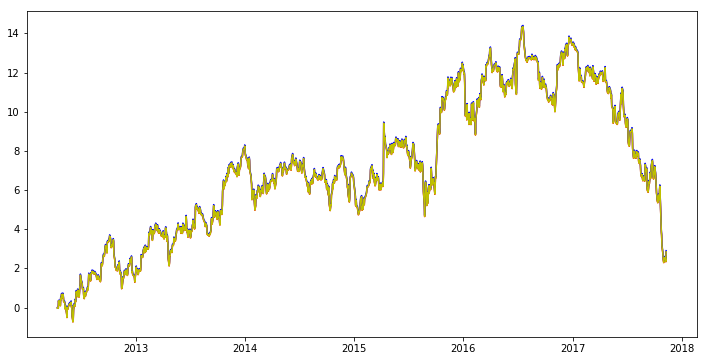

In [14]:
#plot the residuals (Cil)

cilarima_t['resid3']=cilarima_t['Close']-cilarima_t['pred3']
cilarima_t['resid2']=cilarima_t['Close']-cilarima_t['pred2']
cilarima_t['resid4']=cilarima_t['Close']-cilarima_t['pred4']

plt.figure(figsize=(12,6))
plt.plot(cilarima_t['Date'],cilarima_t['resid3'],'r')
plt.plot(cilarima_t['Date'],cilarima_t['resid2'],'b')
plt.plot(cilarima_t['Date'],cilarima_t['resid4'],'y')
plt.show

#plot the residuals (ge)

gearima_t['resid3']=gearima_t['Close']-gearima_t['pred3']
gearima_t['resid2']=gearima_t['Close']-gearima_t['pred2']
gearima_t['resid4']=gearima_t['Close']-gearima_t['pred4']

plt.figure(figsize=(12,6))
plt.plot(gearima_t['Date'],gearima_t['resid3'],'r')
plt.plot(gearima_t['Date'],gearima_t['resid2'],'b')
plt.plot(gearima_t['Date'],gearima_t['resid4'],'y')
plt.show()